In [1]:
# python -m pip install prophet
# here i will try prophet on the loged data so log(x)

In [29]:
import numpy as np
import pandas as pd
import cufflinks as cf
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import plotly.express as px
from datetime import datetime,date
from prophet import Prophet

%matplotlib inline
init_notebook_mode(connected=True)
cf.set_config_file(sharing='private',theme='pearl',offline=True)
#print("Cufflinks Version : {}".format(cf.__version__))

# facebook prophet requires the data to be in 2 colums named ds and y
# ds will be a datetime column with no timezone data and y the label we are forecasting
# ds must NOT be an index like other machine learning algorithms
dfBTCActual = pd.read_csv('./data/BTC-USD.csv')
dfBTC = pd.read_csv('./data/btc-usd-max.csv')
dfBTC.drop(["market_cap", "total_volume"], axis=1, inplace=True)
dfBTC['price'].fillna(method='ffill', inplace=True)
dfBTC.columns = ['ds','y']
# log data for btc
# dfBTC['y'] = np.log(dfBTC['y'])
# dfBTC['y'].iplot();
dynamic_days = 1550

In [30]:
# exp(log) = x so the orginal data  data for btc
#dfBTC['y'] = np.exp(dfBTC['y'])
dfBTC['y'].iplot();

In [31]:
# log data for btc
#dfBTC['y'] = np.log(dfBTC['y'])

In [32]:
dfBTC['ds'] = pd.to_datetime(dfBTC['ds'])
dfBTC['ds'] = dfBTC['ds'].dt.tz_localize(None)

In [33]:
dfBTC.head()

,ds,y
0,2013-04-28,135.30
1,2013-04-29,141.96
2,2013-04-30,135.30
3,2013-05-01,117.00
4,2013-05-02,103.43


In [34]:
dfBTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3432 entries, 0 to 3431
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      3432 non-null   datetime64[ns]
 1   y       3432 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 53.8 KB


In [35]:
train = dfBTC.iloc[:-dynamic_days]
test = dfBTC.iloc[-dynamic_days:]

In [36]:
# This is fitting only on the training data
m = Prophet(weekly_seasonality=False, seasonality_mode='multiplicative')
m.add_seasonality(name='4-year', period=1460, fourier_order=10)
m.fit(train)
# just a placeholder to hold our future predictions
# periods is how far in the future we want to predict and freq is the frequency of the data
# if we want monthly data then freq='MS'
future = m.make_future_dataframe(periods=dynamic_days,freq = 'D')

# to make predictions 
forecast = m.predict(future)

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [37]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,4-year,4-year_lower,4-year_upper,daily,...,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2013-04-28,29.205864,-349.745092,480.353507,29.205864,29.205864,-1.712636,-1.712636,-1.712636,4.013197,...,2.150209,2.150209,2.150209,-0.150352,-0.150352,-0.150352,0.0,0.0,0.0,92.004578
1,2013-04-29,29.339755,-331.403919,495.675822,29.339755,29.339755,-1.710593,-1.710593,-1.710593,4.013197,...,2.186478,2.186478,2.186478,-0.116127,-0.116127,-0.116127,0.0,0.0,0.0,93.490468
2,2013-04-30,29.473645,-339.504566,474.665897,29.473645,29.473645,-1.707430,-1.707430,-1.707430,4.013197,...,2.219291,2.219291,2.219291,-0.086476,-0.086476,-0.086476,0.0,0.0,0.0,94.884243
3,2013-05-01,29.607536,-363.742939,509.553945,29.607536,29.607536,-1.703195,-1.703195,-1.703195,4.013197,...,2.248119,2.248119,2.248119,-0.061883,-0.061883,-0.061883,0.0,0.0,0.0,96.168813
4,2013-05-02,29.741427,-345.791204,497.765796,29.741427,29.741427,-1.697937,-1.697937,-1.697937,4.013197,...,2.272529,2.272529,2.272529,-0.042731,-0.042731,-0.042731,0.0,0.0,0.0,97.329683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,2022-09-17,14635.571305,35394.991399,59004.390847,10861.158742,18053.220715,-1.553667,-1.553667,-1.553667,4.013197,...,2.275255,2.275255,2.275255,-0.184276,-0.184276,-0.184276,0.0,0.0,0.0,47935.221229
3428,2022-09-18,14642.759174,35190.108688,59007.316398,10864.626341,18063.239641,-1.549468,-1.549468,-1.549468,4.013197,...,2.257793,2.257793,2.257793,-0.205936,-0.205936,-0.205936,0.0,0.0,0.0,47703.075276
3429,2022-09-19,14649.947043,34929.408899,58603.874195,10868.093939,18072.998547,-1.545350,-1.545350,-1.545350,4.013197,...,2.241830,2.241830,2.241830,-0.226017,-0.226017,-0.226017,0.0,0.0,0.0,47492.635241
3430,2022-09-20,14657.134913,34899.575264,58456.194368,10871.561538,18082.659876,-1.541300,-1.541300,-1.541300,4.013197,...,2.226842,2.226842,2.226842,-0.245056,-0.245056,-0.245056,0.0,0.0,0.0,47296.260711


<AxesSubplot:xlabel='ds'>

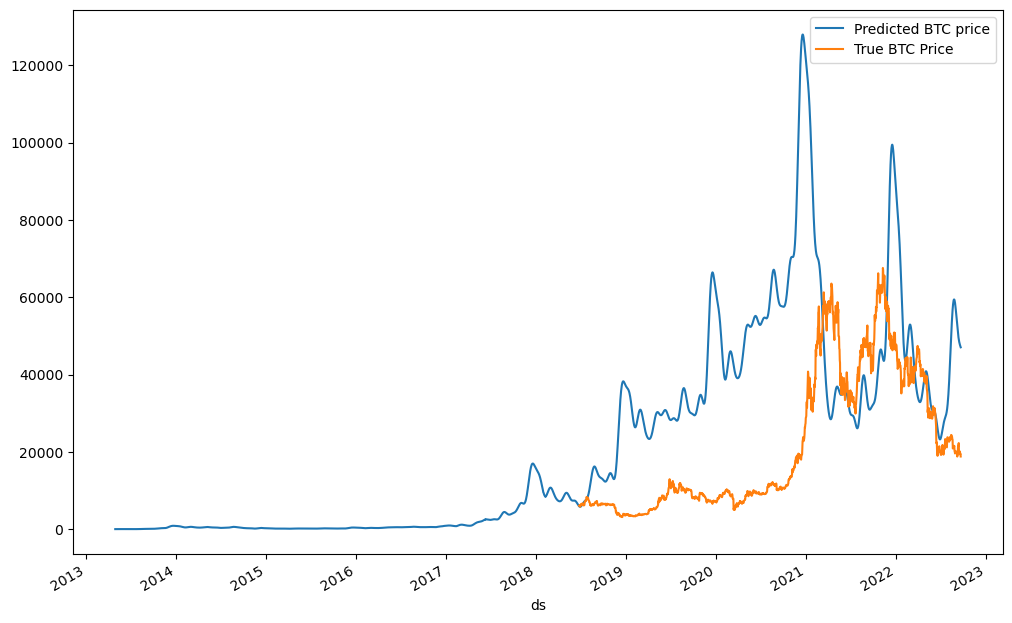

In [38]:
ax = forecast.plot(x='ds',y='yhat',label='Predicted BTC price',legend=True,figsize=(12,8))
test.plot(x='ds',y='y',label='True BTC Price',legend=True,ax=ax)

In [39]:
from statsmodels.tools.eval_measures import rmse

In [40]:
predictions = forecast.iloc[-dynamic_days:]['yhat']

In [41]:
rmse(predictions,test['y'])

33306.28735041039

In [42]:
# very large difference as it is roughly as equal half of the mean
test.mean()

C:\Users\sagap\AppData\Local\Temp\ipykernel_19028\3796774242.py:2: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



y    21730.279757
dtype: float64

In [43]:
# prophet has its own diagnostics. we need to define just as done below initial, period and horizon
from prophet.diagnostics import cross_validation,performance_metrics
from prophet.plot import plot_cross_validation_metric

In [44]:
# Initial 5 years training period
initial = 5 * 365
initial = str(initial) + ' days'
# Fold every 1 years
period = 1 * 365
period = str(period) + ' days'
# Forecast 1 year into the future
horizon = 365
horizon = str(horizon) + ' days'

In [45]:
#df_cv = cross_validation(m, initial=initial, period=period, horizon = horizon)

In [46]:
# thgis is the raw dataset that is returned via the above
#performance_metrics(df_cv)

In [47]:
# we can plt a specific metric of the above which shows that mse increases over time so up to 50 days we are ok
# more than that rmse increases a lot
#plot_cross_validation_metric(df_cv, metric='rmse');

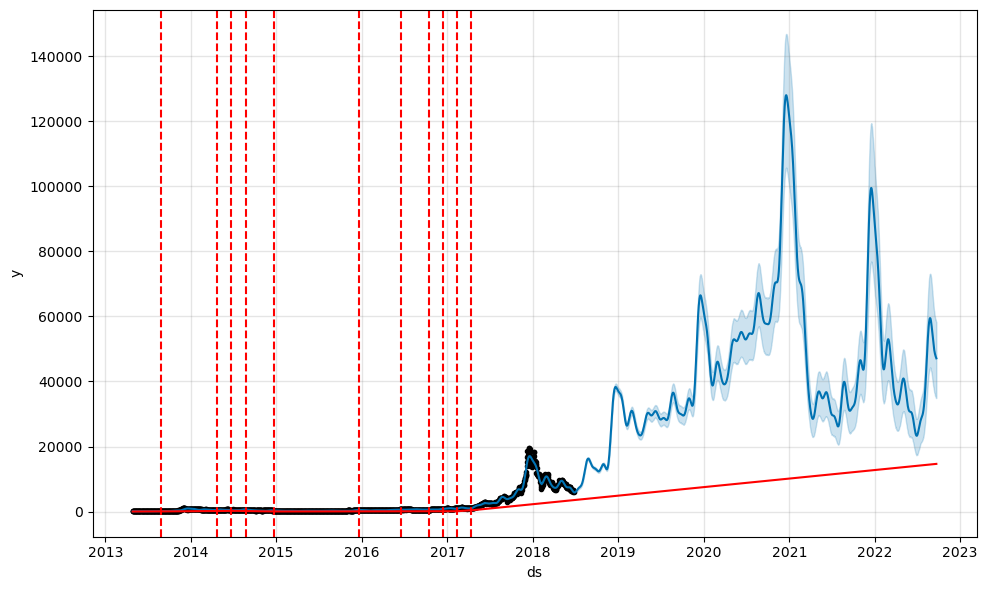

In [48]:
# to see the trend change points
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

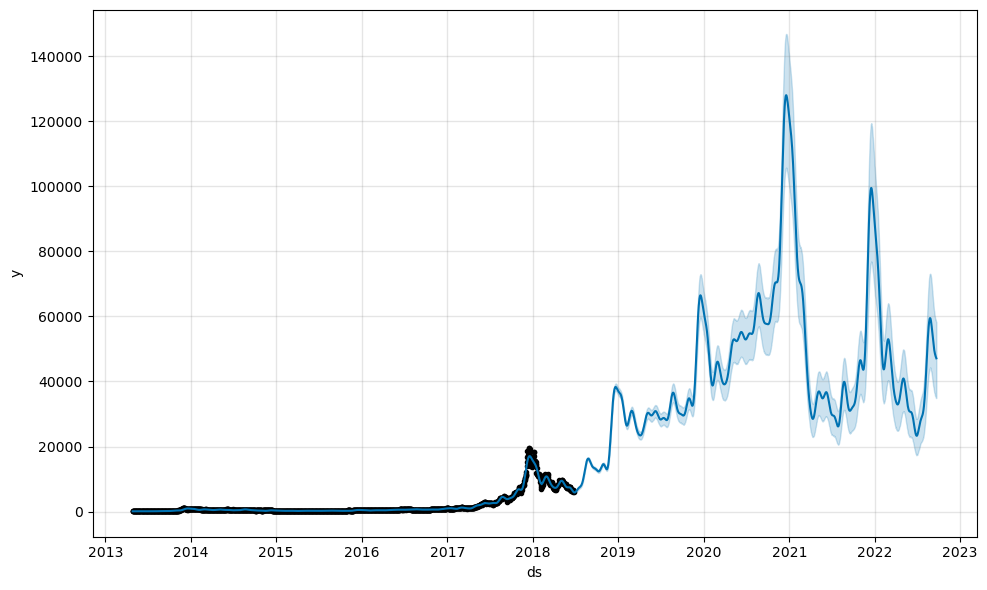

In [49]:
# we can use prophets own tools for plotting and analysis
import matplotlib.pyplot as plt
m.plot(forecast);
# plt.xlim('2014-01-01','2022-01-01') # we can use xlim to limit the data being plotted

In [ ]:
# now I will include the test data in the training set and forecast 2 months in the future
m = Prophet(weekly_seasonality=False, seasonality_mode='multiplicative')
m.add_seasonality(name='4-year', period=1460, fourier_order=10)
m.fit(dfBTC)
# just a placeholder to hold our future predictions
# periods is how far in the future we want to predict and freq is the frequency of the data
# if we want monthly data then freq='MS'
future = m.make_future_dataframe(periods=dynamic_days,freq = 'D')

# to make predictions 
forecast = m.predict(future)


In [ ]:
fig = m.plot(forecast)

In [ ]:
fig = m.plot_components(forecast)

In [ ]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [ ]:
# final plot but with plotly
forecastPlotly = forecast.copy()
forecastPlotly['date'] = pd.to_datetime(forecastPlotly['ds'])
forecastPlotly = forecastPlotly.set_index('date')
forecastPlotly = forecastPlotly.drop(['ds'], axis=1)
forecastPlotly[['yhat_lower','yhat_upper', 'yhat']].iplot()

In [ ]:
dfBTCActual['date'] = pd.to_datetime(dfBTCActual['Date'])
dfBTCActual = dfBTCActual.set_index('date')
dfBTCActual = dfBTCActual.drop(['Date'], axis=1)
result = forecastPlotly.join(dfBTCActual, how='outer')

In [ ]:
result[['yhat', 'Close']].iplot()